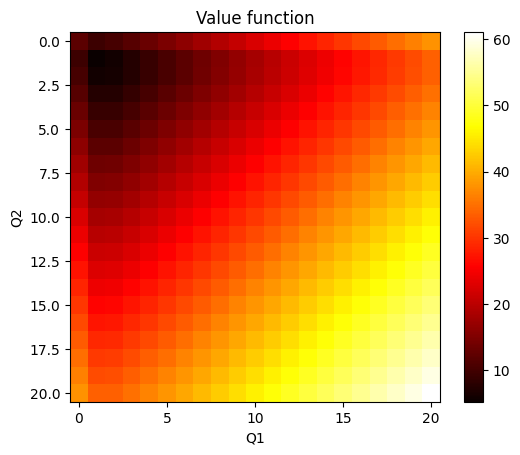

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
μ1 = 0.2
μ2 = 0.4
λ = 0.3
gamma = 0.99

# Define state space
Q1_max = 20
Q2_max = 20
states = [(Q1, Q2) for Q1 in range(Q1_max + 1) for Q2 in range(Q2_max + 1)]

# Initialize value function
V = np.zeros((Q1_max + 1, Q2_max + 1))

# Define small δ for stopping criterion
δ = 1e-5

# Perform Iterative Policy Evaluation
while True:
    V_prev = V.copy()
    for Q1, Q2 in states:
        V_1 = gamma*0.5 * (λ + μ1 * V[Q1 - 1, Q2] + μ2 * V[Q1, Q2 - 1]) + 0.5 * (1 - λ - μ1 - μ2) * V[Q1, Q2] + Q1 + Q2
        V_2 = gamma*0.5 * (λ + μ1 * V[Q1, Q2 - 1] + μ2 * V[Q1 - 1, Q2]) + 0.5 * (1 - λ - μ1 - μ2) * V[Q1, Q2] + Q1 + Q2
        V[Q1, Q2] = max(V_1, V_2)

    # Check stopping criterion
    if np.abs(V - V_prev).max() < δ:
        break

# Plot the value function
plt.imshow(V, cmap='hot')
plt.colorbar()
plt.xlabel("Q1")
plt.ylabel("Q2")

plt.title("Value function")
plt.show()


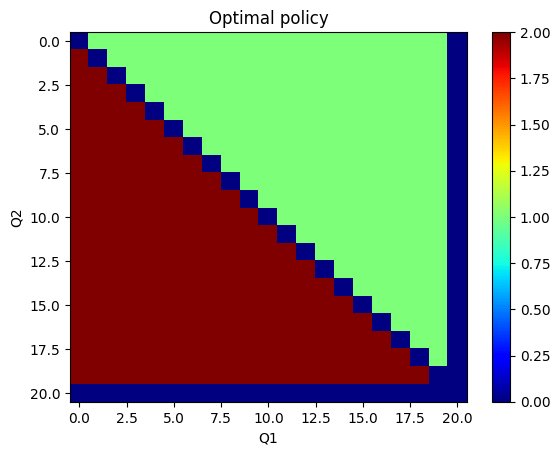

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Q_max = 20
μ1 = 0.2
μ2 = 0.4
λ = 0.3
gamma = 0.99


# Initialize value function
V = np.zeros((Q_max+1, Q_max+1))

# Value Iteration Algorithm
delta = 1e-8
while delta > 1e-12:
    delta = 0
    for q1 in range(Q_max+1):
        for q2 in range(Q_max+1):
            if q1 == Q_max or q2 == Q_max:
                continue
            v = V[q1, q2]
            q1_, q2_ = q1 + 1, q2
            v1 = λ * (V[min(q1_,Q_max), q2] + 1) + (1 - λ) * (V[q1, q2] + 1)
            q1_, q2_ = q1, q2 + 1
            v2 = λ * (V[q1, min(q2_,Q_max)] + 1) + (1 - λ) * (V[q1, q2] + 1)
            V[q1, q2] = min(v1, v2)
            delta = max(delta, np.abs(v - V[q1, q2]))

# Determine optimal policy
policy = np.zeros((Q_max+1, Q_max+1))
for q1 in range(Q_max+1):
    for q2 in range(Q_max+1):
        if q1 == Q_max or q2 == Q_max:
            continue
        q1_, q2_ = q1 + 1, q2
        v1 =  λ* (V[min(q1_,Q_max), q2] + 1) + (1 - λ) * (V[q1, q2] + 1)
        q1_, q2_ = q1, q2 + 1
        v2 = λ* (V[q1, min(q2_,Q_max)] + 1) + (1 - λ) * (V[q1, q2] + 1)
        if v1 < v2:
            policy[q1, q2] = 1
        elif v2 < v1:
            policy[q1, q2] = 2
        else:
            policy[q1, q2] = 0

# Plot optimal policy
x, y = np.meshgrid(range(Q_max+1), range(Q_max+1))
z = policy[x, y]

plt.pcolor(x, y, z, cmap='jet')
plt.colorbar()
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.title('Optimal policy')
plt.gca().invert_yaxis()  # Flip the y-axis
plt.show()



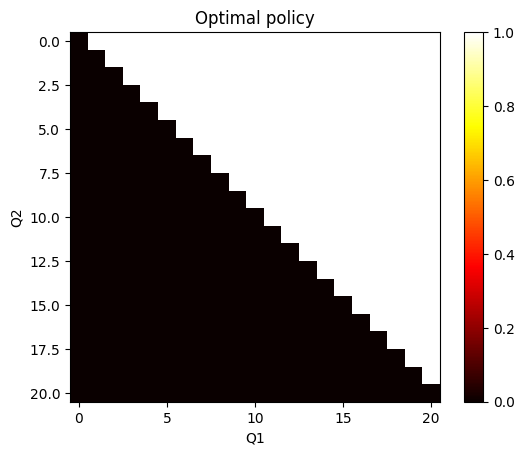

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
μ1 = 0.2
μ2 = 0.4
λ = 0.3
gamma = 0.99

# Define state space
Q1_max = 20
Q2_max = 20
states = [(Q1, Q2) for Q1 in range(Q1_max + 1) for Q2 in range(Q2_max + 1)]
# We initialite Q
Q = np.zeros((Q1_max + 1, Q2_max + 1, 2))
# Initialize value function
V = np.zeros((Q1_max + 1, Q2_max + 1))

# Define small δ for stopping criterion
δ = 1e-5

# Perform Iterative Policy Evaluation
while True:
    V_prev = V.copy()
    for Q1, Q2 in states:
       Q_1 = λ + μ1 * V[Q1 - 1, Q2] + μ2 * V[Q1, Q2 - 1] + Q1 + Q2
       Q_2 = λ + μ1 * V[Q1, Q2 - 1] + μ2 * V[Q1 - 1, Q2] + Q1 + Q2
       Q[Q1, Q2, 0] = Q_1
       Q[Q1, Q2, 1] = Q_2
       V[Q1, Q2] = max(Q_1, Q_2)
       policy = np.argmax(Q, axis=2)


    # Check stopping criterion
    if np.abs(V - V_prev).max() < δ:
        break

# Plot the value function
plt.imshow(policy, cmap='hot')
plt.colorbar()
plt.xlabel("Q1")
plt.ylabel("Q2")

plt.title("Optimal policy")
plt.show()


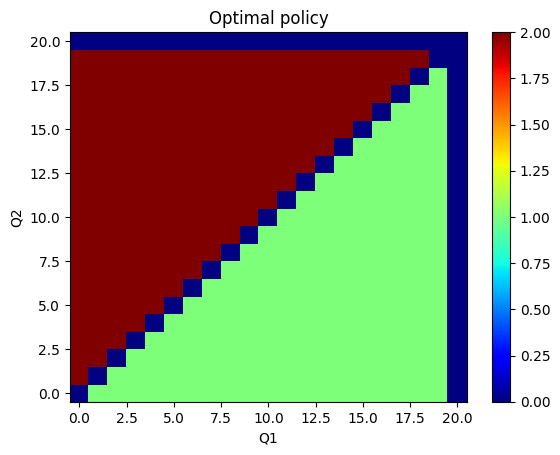

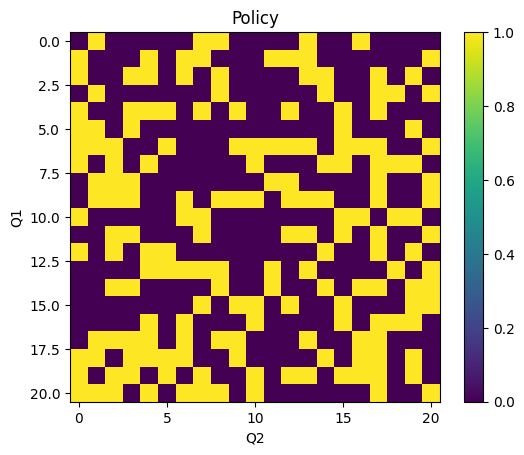

In [39]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
γ = 0.99
λ = 0.3
µ1 = 0.2
µ2 = 0.4

# Initialize Q-values
Q = np.zeros((21, 21, 2))

# Choose a random policy as initial policy
policy = np.zeros((21, 21, 2))
policy[:, :, 0] = 0.5
policy[:, :, 1] = 0.5

# Number of iterations
num_iterations = 1000

# TD(0) algorithm
for n in range(1, num_iterations+1):
  # Sample a state (Q1, Q2)
  Q1, Q2 = np.random.choice(range(21)), np.random.choice(range(21))
  s = (Q1, Q2)

  # Choose an action based on the current policy
  a = np.random.choice([0, 1], p=policy[Q1, Q2])
  
  # Calculate the next state and reward
  next_Q1 = Q1
  next_Q2 = Q2
  r = Q1 + Q2

  if np.random.uniform() < λ:
    if Q1 < 20:
      next_Q1 += 1
    elif Q2 < 20:
      next_Q2 += 1
  elif np.random.uniform() < µ1:
    if Q1 > 0:
      next_Q1 -= 1
  elif np.random.uniform() < µ2:
    if Q2 > 0:
      next_Q2 -= 1
  
  next_s = (next_Q1, next_Q2)

  # Update the Q-value for (s, a)
  αn = 1/n
  Q[Q1, Q2, a] += αn * (r + γ * np.max(Q[next_Q1, next_Q2]) - Q[Q1, Q2, a])

  # Update the policy
  policy[Q1, Q2] = np.zeros(2)
  policy[Q1, Q2, np.argmax(Q[Q1, Q2])] = 1
  
  
  
plt.imshow(np.argmax(policy, axis=2))
plt.colorbar()
plt.title("Policy")
plt.xlabel("Q2")
plt.ylabel("Q1")
plt.show()




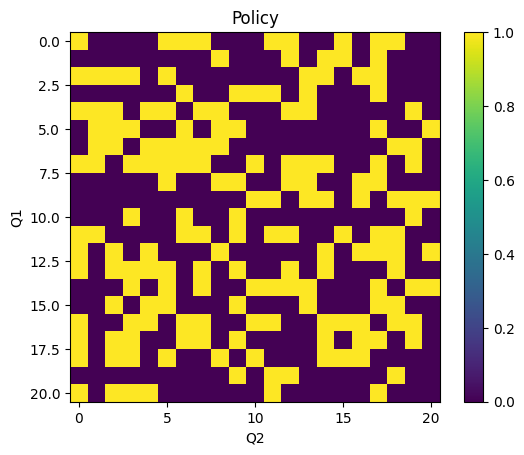

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
γ = 0.99
λ = 0.3
µ1 = 0.2
µ2 = 0.4
α = 0.1
# Initialize Q-values
Q = np.zeros((21, 21, 2))

# Choose a random policy as initial policy
policy = np.zeros((21, 21, 2))
policy[:, :, 0] = 0.5
policy[:, :, 1] = 0.5

# Number of iterations
num_iterations = 1000

# TD(0) algorithm
for n in range(1, num_iterations+1):
  # Sample a state (Q1, Q2)
  Q1, Q2 = np.random.choice(range(21)), np.random.choice(range(21))
  s = (Q1, Q2)

  # Choose an action based on the current policy
  a = np.random.choice([0, 1], p=policy[Q1, Q2])
  
  # Calculate the next state and reward
  next_Q1 = Q1
  next_Q2 = Q2
  r = Q1 + Q2

  if np.random.uniform() < λ:
    if Q1 < 20:
      next_Q1 += 1
    elif Q2 < 20:
      next_Q2 += 1
  elif np.random.uniform() < µ1:
    if Q1 > 0:
      next_Q1 -= 1
  elif np.random.uniform() < µ2:
    if Q2 > 0:
      next_Q2 -= 1
  
  next_s = (next_Q1, next_Q2)

  # Update the Q-value for (s, a)
  αn = α
  Q[Q1, Q2, a] += αn * (r + γ * np.max(Q[next_Q1, next_Q2]) - Q[Q1, Q2, a])
 

  # Update the policy
  policy[Q1, Q2] = np.zeros(2)
  policy[Q1, Q2, np.argmax(Q[Q1, Q2])] = 1
  
  
  
plt.imshow(np.argmax(policy, axis=2))
plt.colorbar()
plt.title("Policy")
plt.xlabel("Q2")
plt.ylabel("Q1")
plt.show()



In [6]:
import numpy as np
import tensorflow as tf

# define hyperparameters
episodes = 5000
steps_per_episode = 200
learning_rate = 0.001
gamma = 0.99

# define state space
state_space = [i for i in range(21) for j in range(21)]

# define action space
action_space = [0, 1]

# define the probability of events
λ = 0.3
µ1  = 0.2
µ2 = 0.4

# define the reward function
def reward(state):
    q1, q2 = state
    return q1 + q2

# define the transition function
def transition(state, action):
    q1, q2 = state
    if action == 0:
        if q1 < 20:
            if np.random.uniform(0,1) < λ:
                q1 += 1
        if q1 > 0:
            if np.random.uniform(0,1) < µ1 :
                q1 -= 1
    elif action == 1:
        if q2 < 20:
            if np.random.uniform(0,1) < λ :
                q2 += 1
        if q2 > 0:
            if np.random.uniform(0,1) < µ2 :
                q2 -= 1
    next_state = (q1, q2)
    return next_state

# define the policy network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(21*21,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate), loss='categorical_crossentropy')

# define the value network
value_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(21*21,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
value_model.compile(optimizer=tf.optimizers.Adam(learning_rate), loss='mean_squared_error')

# train the network
for episode in range(episodes):
    state = (0, 0)
    episode_reward = 0
    for step in range(steps_per_episode):
        state_vector = np.zeros((1, 21*21))
        state_vector[0, state[0]*21 + state[1]] = 1
        policy = model.predict(state_vector)[0]
        action = np.random.choice(action_space, p=policy)
        next_state = transition(state,action)       
        next_state_vector = np.zeros((1, 21*21))
        next_state_vector[0, next_state[0]*21 + next_state[1]] = 1
        episode_reward += reward(state)
        target = reward(state) + gamma * value_model.predict(next_state_vector)[0][0]
        value_model.fit(state_vector, np.array([target]), verbose=0)
        one_hot_action = np.zeros((1, 2))
        one_hot_action[0, action] = 1
        advantage = target - value_model.predict(state_vector)[0][0]
        model.fit(state_vector, one_hot_action * advantage, verbose=0)
        state = next_state
        if episode % 100 == 0:
            print("Episode: {}/{}, Reward: {}".format(episode, episodes, episode_reward/steps_per_episode))


total_reward = 0
state = (0,0)
for i in range(1000):
    state_vector = np.zeros((1, 21*21))
    state_vector[0, state[0]*21 + state[1]] = 1
    policy = model.predict(state_vector)[0]
    action = np.argmax(policy)
    next_state = transition(state, action)
    total_reward += reward(state)
    state = next_state
print("Average reward over 1000 steps: {}".format(total_reward/1000))

ModuleNotFoundError: No module named 'tensorflow'